# 回归：推荐
《机器学习系统设计》第七章

## 用回归预测房价
仅使用第5维特征(RM)预测

RMSE (no intercept): 7.64268509309


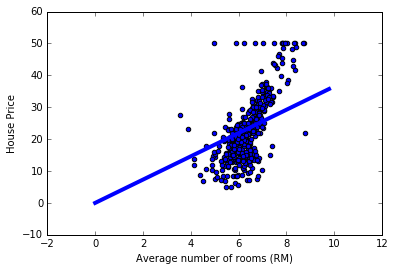

In [2]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

boston = load_boston()
# boston.data.shape  # (506, 13)
# boston.feature_names  # ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']
# boston.target.shape  # (506,)

# Index number five in the number of rooms
fig, ax = plt.subplots()
ax.scatter(boston.data[:, 5], boston.target)
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")

x = boston.data[:, 5]
# fit (used below) takes a two-dimensional array as input. We use np.atleast_2d
# to convert from one to two dimensional, then transpose to make sure that the
# format matches:
x = np.transpose(np.atleast_2d(x))

y = boston.target

lr = LinearRegression(fit_intercept=False)
lr.fit(x, y)

ax.plot([0, boston.data[:, 5].max() + 1], [0, lr.predict(boston.data[:, 5].max() + 1)], '-', lw=4)

mse = mean_squared_error(y, lr.predict(x))
rmse = np.sqrt(mse)
print('RMSE (no intercept): {}'.format(rmse))

均方根误差(Root Mean Square Error,RMSE),最初无偏移的回归，得到7.6误差，如果加上偏移项，提升到6.6。表明我们可以预期的价格和真实价格之间最多相差1.3w美元。

R平方项：模型可以解释价格的百分比，如下面例子，模型可以解释房价的48%。

均方根误差与标准差，是近似相对的。由于大多数数据与它的均值之间的偏移量和最多是两个标准差，所以我们可以将RMSE乘以2，得到一个较为粗略的置信区间。这只有在误差是正态分布的情况下才完全成立，但即使是非正态分布，也可以认为这是近似正确的。

Mean squared error (of training data): 43.6
Root mean squared error (of training data): 6.6
COD (on training data): 0.48


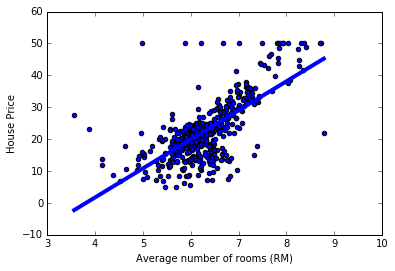

In [3]:
# Repeat, but fitting an intercept this time:
lr = LinearRegression(fit_intercept=True)

lr.fit(x, y)

fig, ax = plt.subplots()
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")
ax.scatter(boston.data[:, 5], boston.target)
xmin = x.min()
xmax = x.max()
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]) , '-', lw=4)

mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (of training data): {:.3}".format(mse))

rmse = np.sqrt(mse)
print("Root mean squared error (of training data): {:.3}".format(rmse))

cod = r2_score(y, lr.predict(x))
print('COD (on training data): {:.2}'.format(cod))

### 多维回归

Residual: 4.67950630064


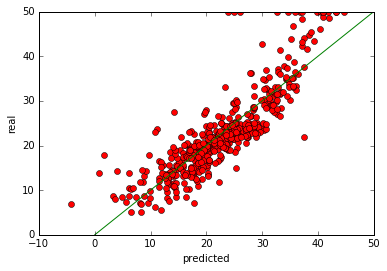

In [4]:
import numpy as np
from sklearn.datasets import load_boston
import pylab as plt

boston = load_boston()
x = np.array([np.concatenate((v, [1])) for v in boston.data])  # 使用[v,1]而不是[v]
y = boston.target

# np.linal.lstsq implements least-squares linear regression
s, total_error, _, _ = np.linalg.lstsq(x, y)

rmse = np.sqrt(total_error[0] / len(x))
print('Residual(RMSE): {}'.format(rmse))

# Plot the prediction versus real:
plt.plot(np.dot(x, s), boston.target, 'ro')

# Plot a diagonal (for reference):
plt.plot([0, 50], [0, 50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

## 惩罚式回归
- OLS:$\vec{b}^*=arg min_{\vec{b}}(y-X\vec{b})^2$
- L1:$\vec{b}^*=arg min_{\vec{b}}(y-X\vec{b})^2+\lambda\sum_i|b_i|$
- L2:$\vec{b}^*=arg min_{\vec{b}}(y-X\vec{b})^2+\lambda\sum_i{b_i}^2$

L1叫Lasso，L2叫Ridge regression，两者结合起来叫Elastic net模型。Lasso和岭回归会比非惩罚回归得到更小的模型系数。Lasso有一个额外性质：它会使更多的系数为0！这就是说，最终的模型是稀疏的。

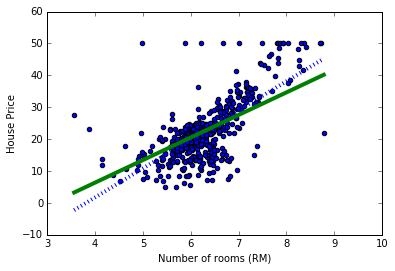

In [5]:
from sklearn.linear_model import LinearRegression, Lasso
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

boston = load_boston()
fig, ax = plt.subplots()
ax.scatter(boston.data[:, 5], boston.target)
ax.set_xlabel("Number of rooms (RM)")
ax.set_ylabel("House Price")


x = boston.data[:, 5]
xmin = x.min()
xmax = x.max()
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), ':', lw=4, label='OLS model')

las = Lasso()
las.fit(x, y)
ax.plot([xmin, xmax], las.predict([[xmin], [xmax]]), '-', lw=4, label='Lasso model')

## 回归里的交叉验证

In [6]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

# This script fits several forms of penalized regression

from __future__ import print_function
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target

for name, met in [
        ('linear regression', LinearRegression()),
        ('lasso()', Lasso()),
        ('elastic-net(.5)', ElasticNet(alpha=0.5)),
        ('lasso(.5)', Lasso(alpha=0.5)),
        ('ridge(.5)', Ridge(alpha=0.5)),
]:
    # Fit on the whole data:
    met.fit(x, y)

    # Predict on the whole data:
    p = met.predict(x)
    r2_train = r2_score(y, p)

    # Now, we use 10 fold cross-validation to estimate generalization error
    kf = KFold(len(x), n_folds=5)
    p = np.zeros_like(y)
    for train, test in kf:
        met.fit(x[train], y[train])
        p[test] = met.predict(x[test])

    r2_cv = r2_score(y, p)
    print('Method: {}'.format(name))
    print('R2 on training: {}'.format(r2_train))
    print('R2 on 5-fold CV: {}'.format(r2_cv))
    print()
    print()

Method: linear regression
R2 on training: 0.740607742865
R2 on 5-fold CV: 0.559652434646


Method: lasso()
R2 on training: 0.682549461751
R2 on 5-fold CV: 0.579568206639


Method: elastic-net(.5)
R2 on training: 0.705578246881
R2 on 5-fold CV: 0.635010824567


Method: lasso(.5)
R2 on training: 0.713950619704
R2 on 5-fold CV: 0.589940808802


Method: ridge(.5)
R2 on training: 0.739919756984
R2 on 5-fold CV: 0.575768405238




In [9]:
# use download_e2006.sh to download train data
!ls data/E2006.train

data/E2006.train


### 训练误差与泛化误差

In [10]:
# This code is supporting material for the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing
#
# It is made available under the MIT License

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

# Whether to use Elastic nets (otherwise, ordinary linear regression is used)

# Load data:
data, target = load_svmlight_file('data/E2006.train')

lr = LinearRegression()

# Compute error on training data to demonstrate that we can obtain near perfect
# scores:

lr.fit(data, target)
pred = lr.predict(data)

print('RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on training, {:.2}'.format(r2_score(target, pred)))
print('')

pred = np.zeros_like(target)
kf = KFold(len(target), n_folds=5)
for train, test in kf:
    lr.fit(data[train], target[train])
    pred[test] = lr.predict(data[test])

print('RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))

RMSE on training, 0.0024
R2 on training, 1.0

RMSE on testing (5 fold), 0.75
R2 on testing (5 fold), -0.43


### 调试参数

[EN 0.1] RMSE on testing (5 fold), 0.4
[EN 0.1] R2 on testing (5 fold), 0.61

[EN CV] RMSE on testing (5 fold), 0.37
[EN CV] R2 on testing (5 fold), 0.65

[EN CV] RMSE on training, 0.37
[EN CV] R2 on training, 0.65
[EN CV l1_ratio] RMSE on testing (5 fold), 0.37
[EN CV l1_ratio] R2 on testing (5 fold), 0.65



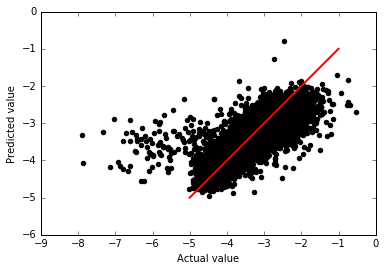

In [11]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

data, target = load_svmlight_file('data/E2006.train')

# Edit the lines below if you want to switch method:
# from sklearn.linear_model import Lasso
# met = Lasso(alpha=0.1)
met = ElasticNet(alpha=0.1)

kf = KFold(len(target), n_folds=5)
pred = np.zeros_like(target)
for train, test in kf:
    met.fit(data[train], target[train])
    pred[test] = met.predict(data[test])

print('[EN 0.1] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN 0.1] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))
print('')

# Construct an ElasticNetCV object (use all available CPUs)
met = ElasticNetCV(n_jobs=-1)

kf = KFold(len(target), n_folds=5)
pred = np.zeros_like(target)
for train, test in kf:
    met.fit(data[train], target[train])
    pred[test] = met.predict(data[test])

print('[EN CV] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))
print('')

met.fit(data, target)
pred = met.predict(data)
print('[EN CV] RMSE on training, {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV] R2 on training, {:.2}'.format(r2_score(target, pred)))


# Construct an ElasticNetCV object (use all available CPUs)
met = ElasticNetCV(n_jobs=-1, l1_ratio=[.01, .05, .25, .5, .75, .95, .99])

kf = KFold(len(target), n_folds=5)
pred = np.zeros_like(target)
for train, test in kf:
    met.fit(data[train], target[train])
    pred[test] = met.predict(data[test])


print('[EN CV l1_ratio] RMSE on testing (5 fold), {:.2}'.format(np.sqrt(mean_squared_error(target, pred))))
print('[EN CV l1_ratio] R2 on testing (5 fold), {:.2}'.format(r2_score(target, pred)))
print('')


fig, ax = plt.subplots()
y = target
ax.scatter(y, pred, c='k')
ax.plot([-5, -1], [-5, -1], 'r-', lw=2)
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')